In [3]:
import pandas as pd
games_season = pd.read_csv('games_season.csv')
games_season.head()

,season,team_1,team_2,home,score_diff,score_1,score_2,won
0,1985,3745,6664,0,17,81,64,1
1,1985,126,7493,1,7,77,70,1
2,1985,288,3593,1,7,63,56,1
3,1985,1846,9881,1,16,70,54,1
4,1985,2675,10298,1,12,86,74,1


In [4]:
games_tourney = pd.read_csv('games_tourney.csv')
games_tourney.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [16]:
# Import Input from tensorflow.keras.layers
from tensorflow.keras.layers import Input, Dense

# Create an input layer of shape 1
input_tensor = Input(shape=(1,))
output_layer = Dense(1, name= 'Predicted-Score-Diff')

output_tensor = output_layer(input_tensor)

print(output_tensor)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='Predicted-Score-Diff/BiasAdd:0', description="created by layer 'Predicted-Score-Diff'")


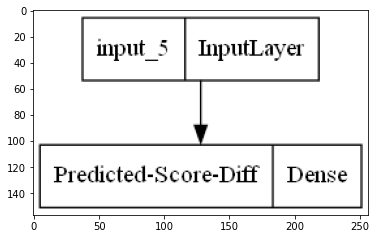

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 Predicted-Score-Diff (Dense  (None, 1)                2         
 )                                                               
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model  #from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

model = Model(input_tensor, output_tensor)
plot_model(model, to_file='model.png')


img = plt.imread('model.png')
plt.imshow(img)
plt.show()
model.summary()

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='mae')

In [24]:
from sklearn.model_selection import train_test_split
games_tourney_train, games_tourney_test = train_test_split(games_tourney)

In [25]:
# Now fit the model
model.fit(games_tourney_train['seed_diff'], games_tourney_train['score_diff'],
          epochs=1,
          batch_size=128,
          validation_split=0.10,
          verbose=True)

23/23 [==============================] - 2s 12ms/step - loss: 12.5413 - val_loss: 12.8178


In [26]:
# Load the X variable from the test data
X_test = games_tourney_test['seed_diff']

# Load the y variable from the test data
y_test = games_tourney_test['score_diff']

# Evaluate the model on the test data
print(model.evaluate(X_test, y_test, verbose=False))

12.604645729064941
